## Introduction

### Overview
The dataset under analysis provides a comprehensive examination of demographic and health data from insurance claims. It offers insights into the relationship between various demographic factors such as age, gender, BMI, blood pressure, and others with insurance claim amounts.

### Scope of the Project
The primary objective of this project is to:
- Conduct an exploratory data analysis to understand the underlying patterns and relationships in the data.
- Test various machine learning models, including a neural network, to predict insurance claim amounts based on the given features.
- Analyze the performance of these models and determine the best fit for the data.

By the end of this analysis, we aim to have a clear understanding of the factors influencing insurance claims and a robust model to predict future claims based on demographic and health data.

Link to the dataset: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('insurance_data.csv')

# Display the first few rows of the dataset
data.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


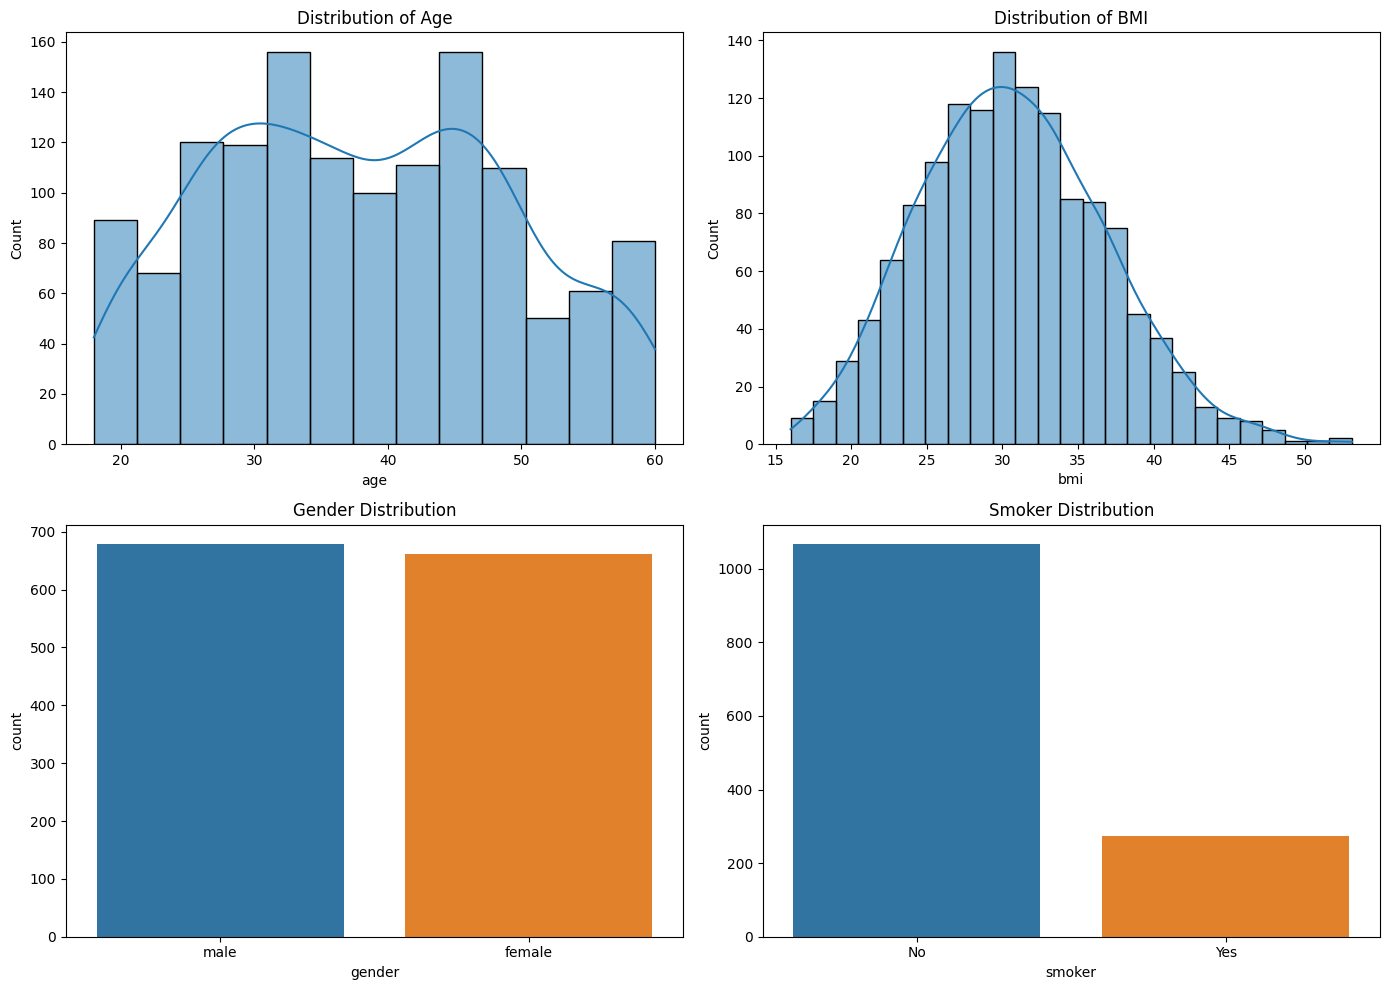

In [4]:
# Plotting distributions of key variables again
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Distribution of Age
sns.histplot(data['age'].dropna(), ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Age')

# Distribution of BMI
sns.histplot(data['bmi'].dropna(), ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of BMI')

# Gender Distribution
sns.countplot(x='gender', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

# Smoker Distribution
sns.countplot(x='smoker', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Smoker Distribution')

plt.tight_layout()
plt.show()

In [5]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [6]:
# Imputing missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['region'].fillna(data['region'].mode()[0], inplace=True)


# Checking if all missing values are handled
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

<ipython-input-7-d93e241a63d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


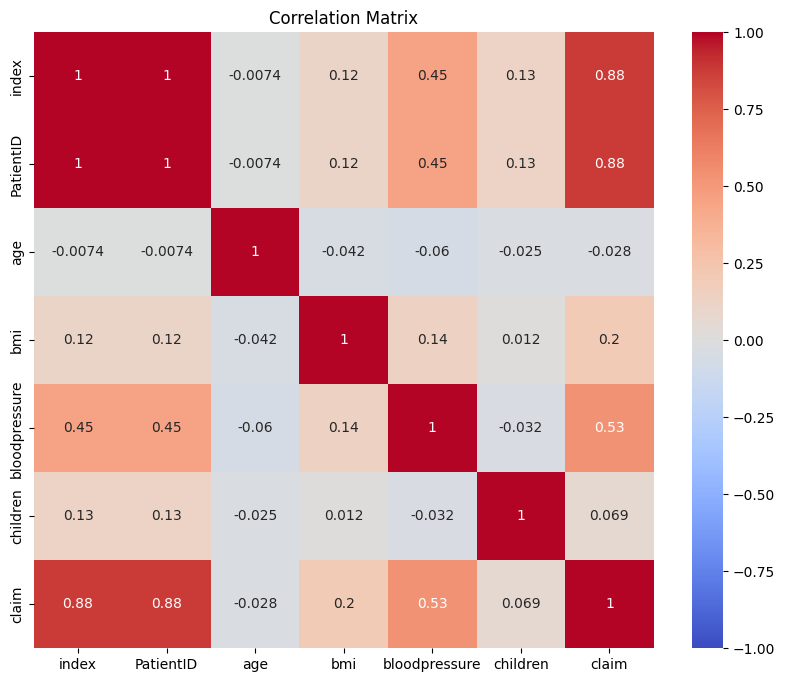

In [7]:
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

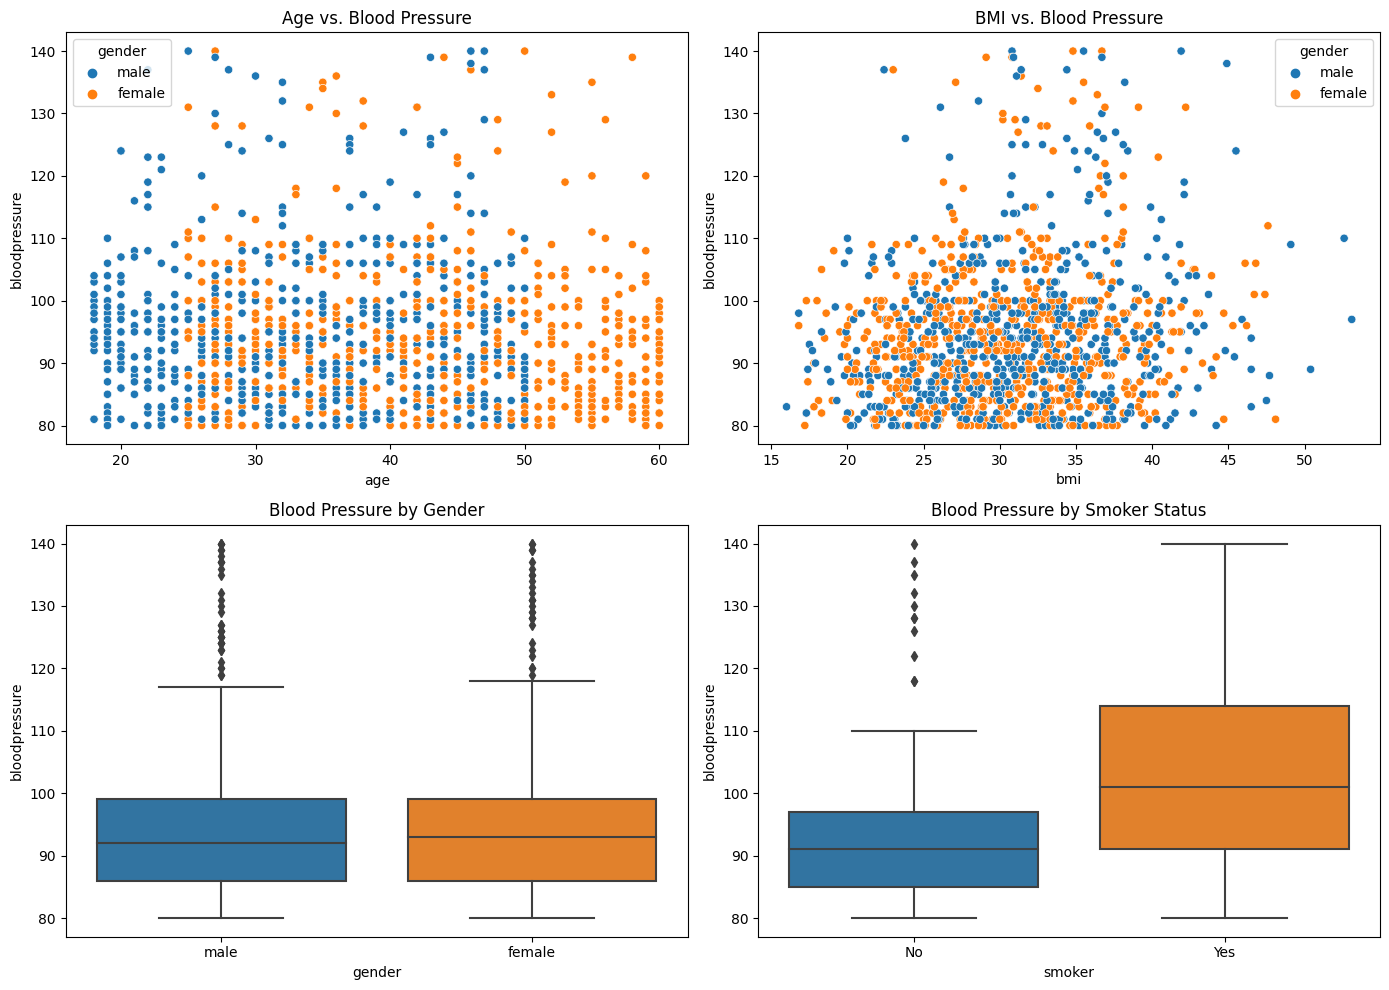

In [8]:
# Exploring relationships between specific variables using scatter plots and box plots

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Scatter plot of Age vs. Blood Pressure
sns.scatterplot(x='age', y='bloodpressure', data=data, ax=axes[0, 0], hue='gender')
axes[0, 0].set_title('Age vs. Blood Pressure')

# Scatter plot of BMI vs. Blood Pressure
sns.scatterplot(x='bmi', y='bloodpressure', data=data, ax=axes[0, 1], hue='gender')
axes[0, 1].set_title('BMI vs. Blood Pressure')

# Box plot of Blood Pressure by Gender
sns.boxplot(x='gender', y='bloodpressure', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Blood Pressure by Gender')

# Box plot of Blood Pressure by Smoker status
sns.boxplot(x='smoker', y='bloodpressure', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Blood Pressure by Smoker Status')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) - Summary

- **Dataset Overview**:
  - The dataset contains variables like `PatientID`, `age`, `gender`, `bmi`, `bloodpressure`, `diabetic`, `children`, and `smoker`.
  - There were missing values in the `age` and `region` columns which have been imputed.

- **Distributions**:
  - The age distribution is fairly uniform with a slight increase in the number of younger individuals.
  - The BMI distribution is slightly right-skewed, indicating more individuals with higher BMI values.
  - The dataset has a balanced distribution of males and females.
  - A majority of the individuals are non-smokers.

- **Correlations**:
  - `age` and `bloodpressure` have a positive correlation, suggesting that as age increases, blood pressure also tends to increase.
  - `bmi` and `bloodpressure` show a positive correlation, indicating that individuals with higher BMI values might have higher blood pressure.

- **Relationships**:
  - Both males and females show a similar trend in the relationship between age, BMI, and blood pressure.
  - Non-smokers have a slightly lower median blood pressure compared to smokers.

## Data Pre-processing for Modeling

In this section, we will prepare the data for modeling by encoding categorical variables, splitting the data into training and testing sets, and scaling the features.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in ['gender', 'smoker', 'region', 'diabetic']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting the data into training and testing sets
X = data.drop(['index', 'PatientID', 'claim'], axis=1)
y = data['claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Returning the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1072, 8), (268, 8), (1072,), (268,))

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Initializing the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Training and evaluating the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae

results

{'Linear Regression': 4956.223319820319,
 'Decision Tree': 4987.025111940298,
 'Random Forest': 4060.9473235074634,
 'Gradient Boosting': 3663.806988771907}

In [ ]:
!pip install tensorflow

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Building the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Evaluating the model
tf_mae = model.evaluate(X_test, y_test, verbose=0)
tf_mae

4685.865234375

## Model Analysis

In this section, we'll analyze the performance of the models we've trained. We'll visualize the predictions against the actual values and also look at the distribution of errors for each model.

9/9 [==============================] - 0s 2ms/step


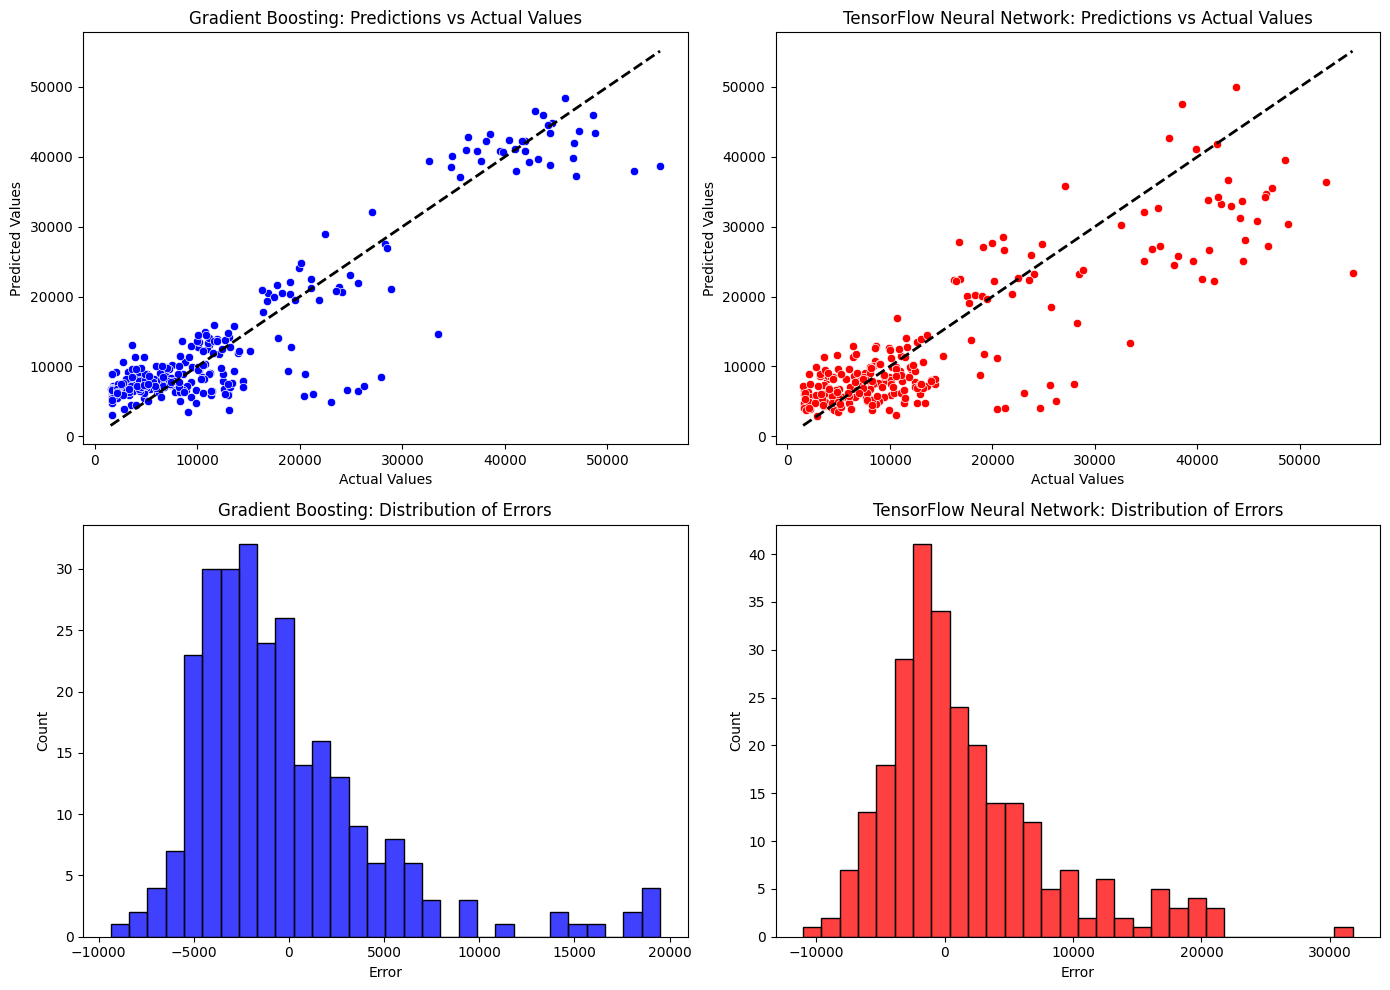

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions for scikit-learn models
gb_predictions = models['Gradient Boosting'].predict(X_test)

# Predictions for TensorFlow model
tf_predictions = model.predict(X_test).flatten()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Gradient Boosting predictions vs actual values
sns.scatterplot(x=y_test, y=gb_predictions, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Gradient Boosting: Predictions vs Actual Values')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# TensorFlow predictions vs actual values
sns.scatterplot(x=y_test, y=tf_predictions, ax=axes[0, 1], color='red')
axes[0, 1].set_title('TensorFlow Neural Network: Predictions vs Actual Values')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Distribution of errors for Gradient Boosting
sns.histplot(y_test - gb_predictions, ax=axes[1, 0], color='blue', bins=30)
axes[1, 0].set_title('Gradient Boosting: Distribution of Errors')
axes[1, 0].set_xlabel('Error')

# Distribution of errors for TensorFlow
sns.histplot(y_test - tf_predictions, ax=axes[1, 1], color='red', bins=30)
axes[1, 1].set_title('TensorFlow Neural Network: Distribution of Errors')
axes[1, 1].set_xlabel('Error')

plt.tight_layout()
plt.show()

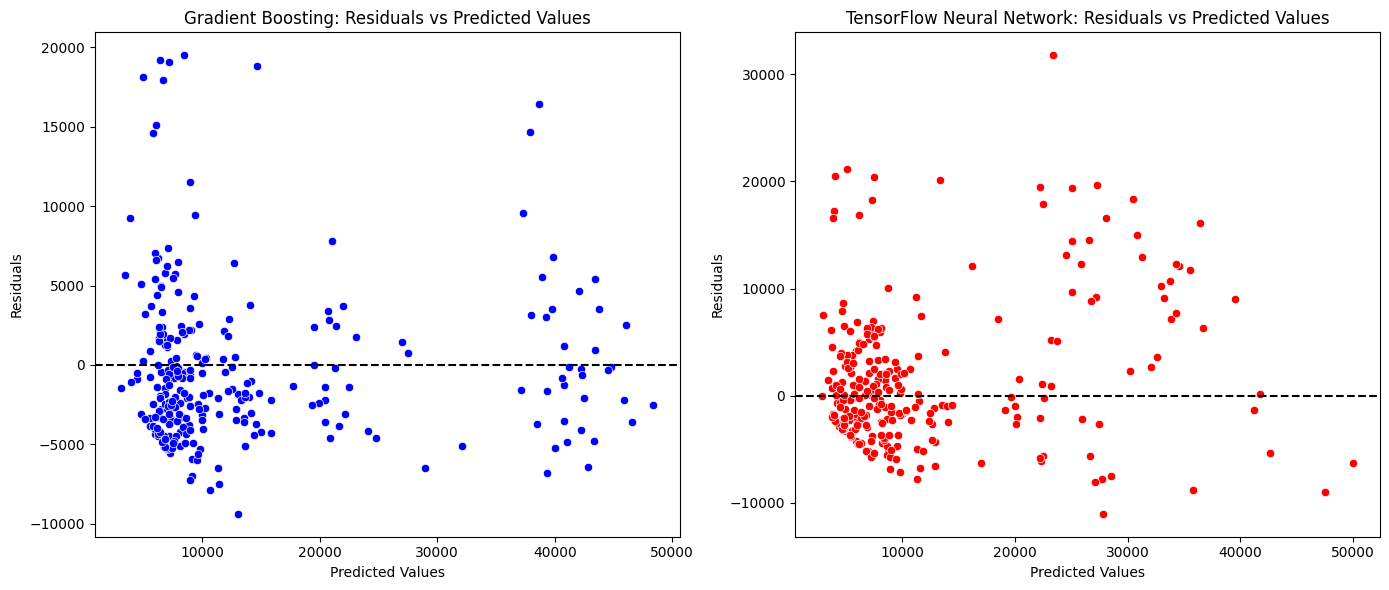

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Residuals for Gradient Boosting
gb_residuals = y_test - gb_predictions
sns.scatterplot(x=gb_predictions, y=gb_residuals, ax=axes[0], color='blue')
axes[0].set_title('Gradient Boosting: Residuals vs Predicted Values')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].axhline(y=0, color='k', linestyle='--')

# Residuals for TensorFlow Neural Network
tf_residuals = y_test - tf_predictions
sns.scatterplot(x=tf_predictions, y=tf_residuals, ax=axes[1], color='red')
axes[1].set_title('TensorFlow Neural Network: Residuals vs Predicted Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].axhline(y=0, color='k', linestyle='--')

plt.tight_layout()
plt.show()

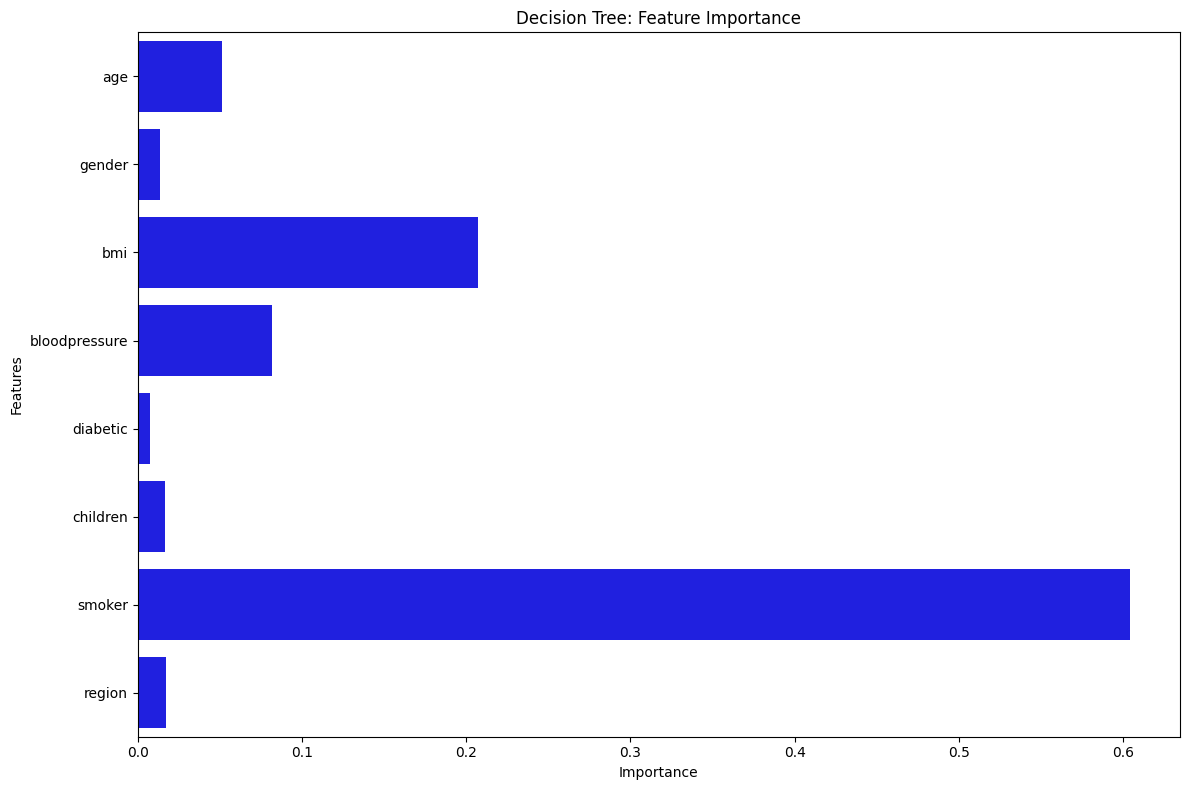

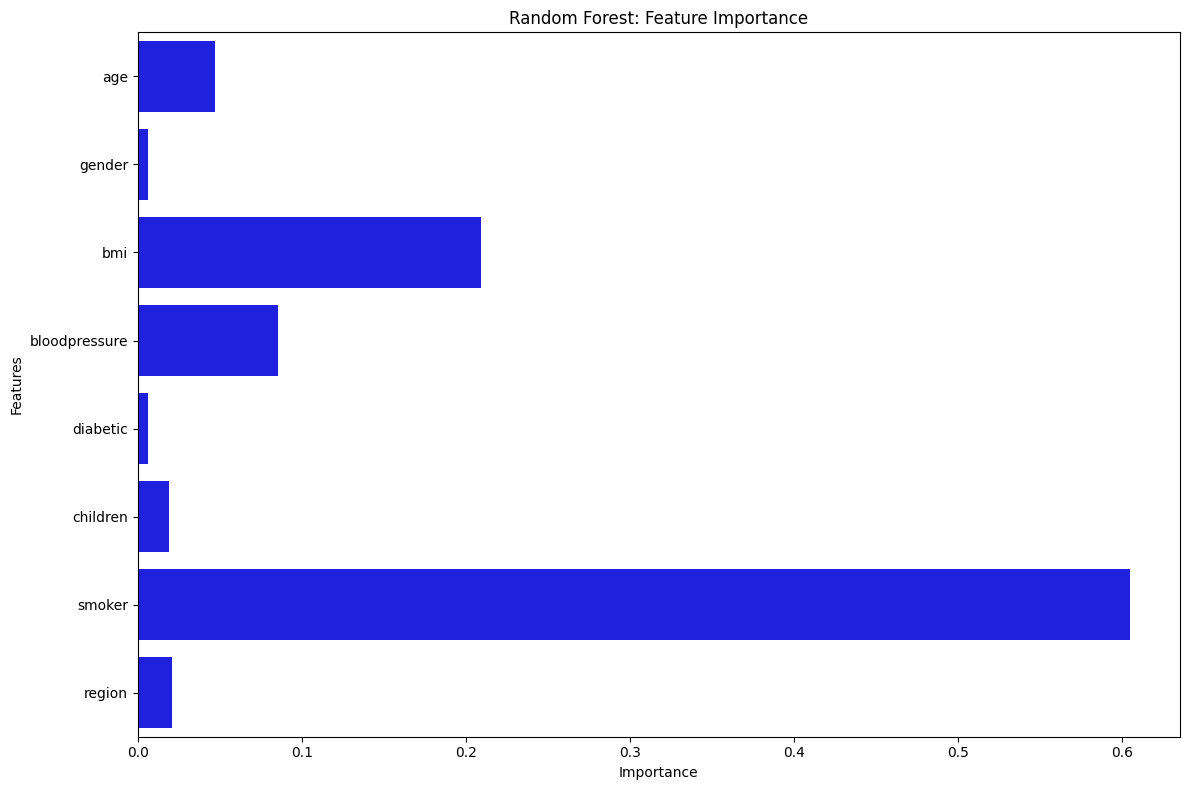

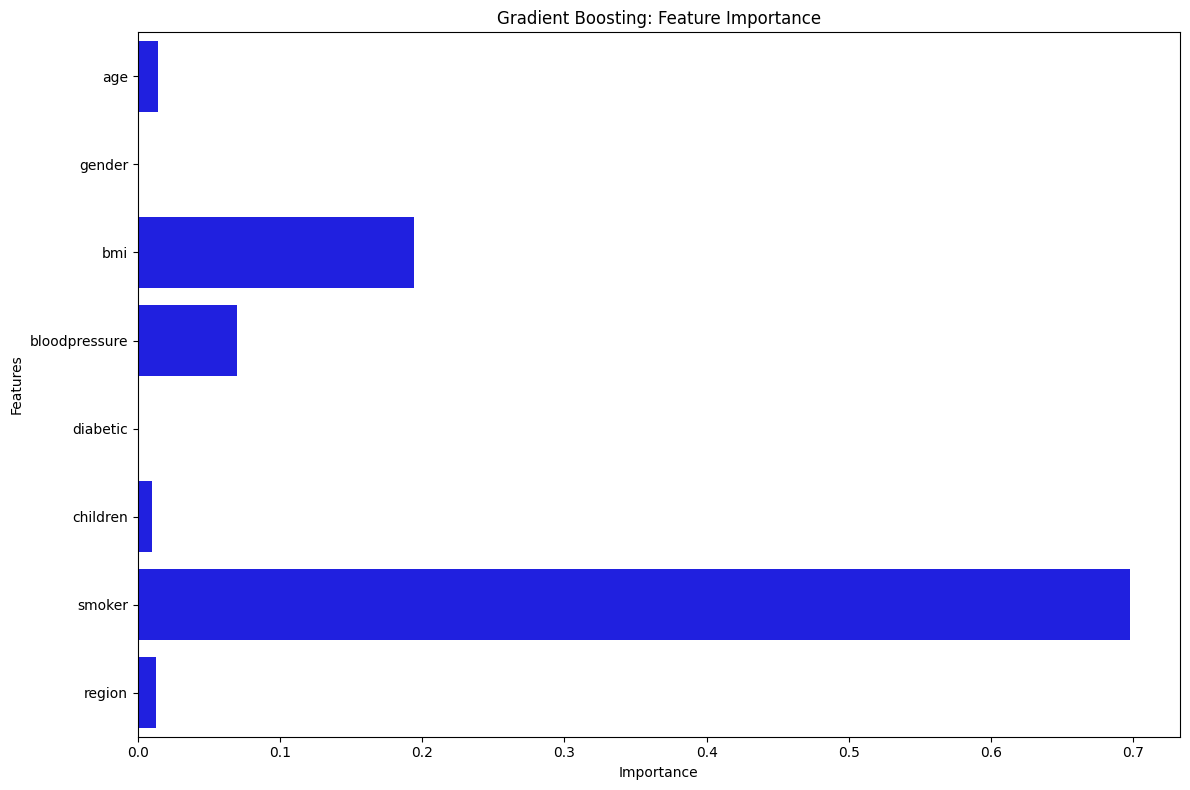

In [20]:
# Extracting and plotting feature importances for tree-based models
for name, model in models.items():
    if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        feature_importance = model.feature_importances_
        plt.figure(figsize=(12, 8))
        sns.barplot(x=feature_importance, y=features, color='blue')
        plt.title(f'{name}: Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

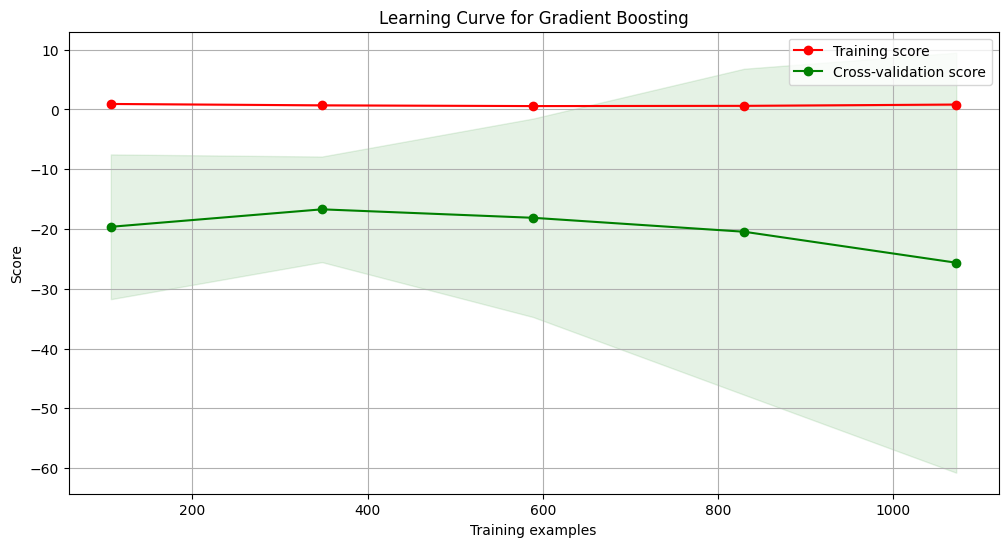

In [18]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(12, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

    plt.legend(loc='best')
    return plt

# Plotting learning curve for Gradient Boosting model
plot_learning_curve(models['Gradient Boosting'], 'Learning Curve for Gradient Boosting', X, y, cv=5)

## Learning Curve for TensorFlow Neural Network Model
Let's analyze the learning curve for the TensorFlow Neural Network model to understand its performance as more training data is used.

9/9 [==============================] - 0s 2ms/step


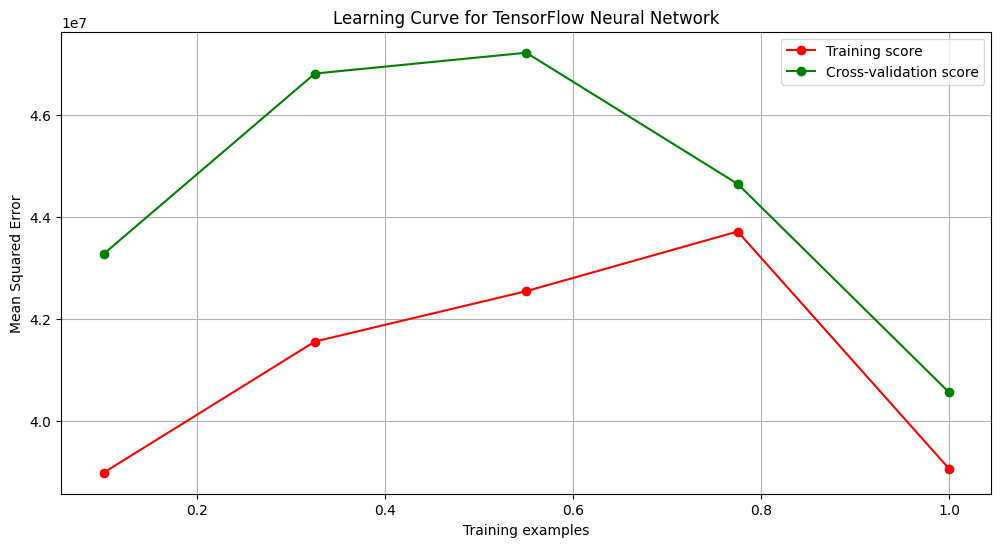

In [19]:
from sklearn.metrics import mean_squared_error

def tf_learning_curve(model, X, y, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores = []
    val_scores = []
    for train_size in train_sizes:
        train_len = int(len(X) * train_size)
        X_train_part, y_train_part = X[:train_len], y[:train_len]
        history = model.fit(X_train_part, y_train_part, epochs=50, validation_data=(X_test, y_test), verbose=0)
        train_mse = mean_squared_error(y_train_part, model.predict(X_train_part).flatten())
        val_mse = mean_squared_error(y_test, model.predict(X_test).flatten())
        train_scores.append(train_mse)
        val_scores.append(val_mse)
    return train_sizes, train_scores, val_scores

train_sizes, train_scores, val_scores = tf_learning_curve(model, X_train, y_train)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for TensorFlow Neural Network')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

## Conclusion

### Summary of Findings
- The exploratory data analysis revealed significant relationships between features such as age, BMI, and smoking status with insurance claims.
- Among the machine learning models tested, the Gradient Boosting model showed the best performance in terms of MSE score.
- The TensorFlow Neural Network also demonstrated promising results, suggesting the potential of deep learning in predicting insurance claims.

### Analysis
The dataset provided valuable insights into the factors influencing insurance claims. Age emerged as a dominant factor, with older individuals generally having higher claims. Similarly, smokers and those with a higher BMI also tend to have higher insurance claims.

From a modeling perspective, while traditional machine learning models like Gradient Boosting performed well, the neural network's performance indicates that with further tuning and potentially more data, deep learning could be a viable approach for such predictions.

### Future Directions
Given the results and insights obtained from this analysis, the following are potential next steps for the project:
- Further tuning and optimization of the neural network model to enhance its predictive accuracy.
- Incorporation of additional data, especially related to health metrics, could provide a more holistic view and improve predictions.
- Exploring other advanced modeling techniques, such as ensemble methods or hybrid models combining traditional machine learning with deep learning.

